## Signal Generation Basics

This example demonstrates the fundamentals of digital signal generation:
- Creating binary sequences (PRBS)
- Mapping bits to symbols
- Generating OOK (On-Off Keying) waveforms
- Understanding samples per symbol (sps)
- Visualizing signals in time and frequency domains

Learning objectives:
- Understand the relationship between symbol rate, sampling rate, and sps
- Learn how digital information is represented as analog waveforms
- Explore the spectral characteristics of different pulse shapes

EXAMPLE 01: Signal Generation Basics

[Step 1] Generating Binary Data
----------------------------------------------------------------------
Generated 100000 bits using PRBS-7
First 20 bits: [0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 1 0]
Bit statistics: 53330 ones, 46670 zeros

[Step 2] Understanding Sampling Parameters
----------------------------------------------------------------------
Symbol rate: 50000.0 kHz
Sampling rate: 400000.0 kHz
Samples per symbol (sps): 8

This means each symbol is represented by 8 samples
Total signal duration: 2.00 ms

[Step 3] Generating Signals with Different Pulse Shapes
----------------------------------------------------------------------
✓ Impulse signal: 800000 samples
✓ Boxcar signal: 800000 samples
✓ Gaussian signal: 800000 samples
✓ RRC signal: 800000 samples
✓ Sinc signal: 800000 samples

[Step 4] Visualizing Time Domain Signals
----------------------------------------------------------------------


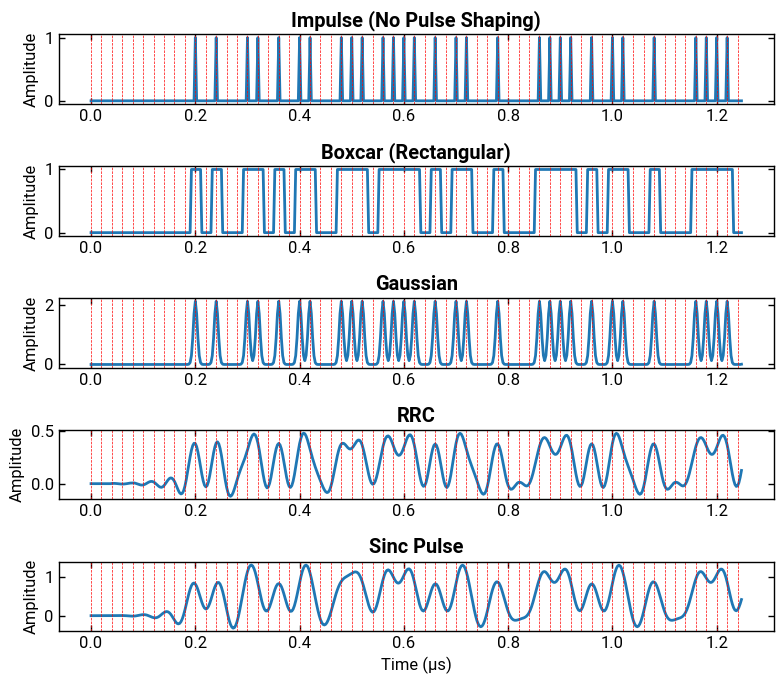


[Step 5] Visualizing Frequency Domain (PSD)
----------------------------------------------------------------------


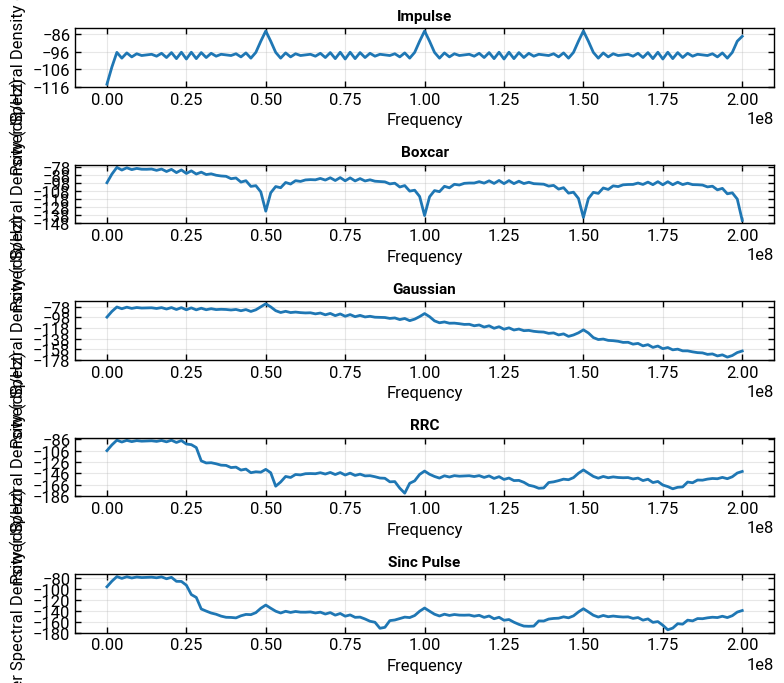

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from commstools import set_backend, Signal
from commstools.dsp.sequences import prbs
from commstools.waveforms import ook

# Use NumPy backend for this example
set_backend("numpy")

print("=" * 70)
print("EXAMPLE 01: Signal Generation Basics")
print("=" * 70)

# =============================================================================
# Step 1: Generate Binary Data
# =============================================================================
print("\n[Step 1] Generating Binary Data")
print("-" * 70)

# Generate a Pseudo-Random Binary Sequence (PRBS)
bits = prbs(length=100000, order=31, seed=2000000000)

print(f"Generated {len(bits)} bits using PRBS-7")
print(f"First 20 bits: {bits[:20]}")
print(f"Bit statistics: {np.sum(bits)} ones, {len(bits) - np.sum(bits)} zeros")

# =============================================================================
# Step 2: Understanding Sampling Parameters
# =============================================================================
print("\n[Step 2] Understanding Sampling Parameters")
print("-" * 70)

# Define system parameters
symbol_rate = 50e6  # 10 kHz symbol rate (10,000 symbols per second)
sampling_rate = 400e6  # 100 kHz sampling rate (100,000 samples per second)
sps = int(sampling_rate / symbol_rate)  # Samples per symbol

print(f"Symbol rate: {symbol_rate / 1e3:.1f} kHz")
print(f"Sampling rate: {sampling_rate / 1e3:.1f} kHz")
print(f"Samples per symbol (sps): {sps}")
print(f"\nThis means each symbol is represented by {sps} samples")
print(f"Total signal duration: {len(bits) / symbol_rate * 1000:.2f} ms")

# =============================================================================
# Step 3: Generate Signals with Different Pulse Shapes
# =============================================================================
print("\n[Step 3] Generating Signals with Different Pulse Shapes")
print("-" * 70)

# 1. Impulse (no pulse shaping) - just zeros inserted
sig_impulse = ook(bits, sampling_rate=sampling_rate, sps=sps, pulse_shape="none")
print(f"✓ Impulse signal: {len(sig_impulse.samples)} samples")

# 2. Boxcar (rectangular) pulse
sig_boxcar = ook(bits, sampling_rate=sampling_rate, sps=sps, pulse_shape="boxcar")
print(f"✓ Boxcar signal: {len(sig_boxcar.samples)} samples")

# 3. Gaussian pulse (smooth transitions)
sig_gaussian = ook(
    bits, sampling_rate=sampling_rate, sps=sps, pulse_shape="gaussian", bt=0.7, span=8
)
print(f"✓ Gaussian signal: {len(sig_gaussian.samples)} samples")

# 4. Root Raised Cosine (RRC) - optimal for ISI control
sig_rrc = ook(
    bits,
    sampling_rate=sampling_rate,
    sps=sps,
    pulse_shape="rrc",
    rolloff=0.15,
    span=8,
)
print(f"✓ RRC signal: {len(sig_rrc.samples)} samples")

# 5. Sinc pulse (ideal low-pass)
sig_sinc = ook(
    bits,
    sampling_rate=sampling_rate,
    sps=sps,
    pulse_shape="sinc",
    span=8,
    bandwidth=0.9,
)
print(f"✓ Sinc signal: {len(sig_sinc.samples)} samples")

# =============================================================================
# Step 4: Visualize Signals in Time Domain
# =============================================================================
print("\n[Step 4] Visualizing Time Domain Signals")
print("-" * 70)

fig, axs = plt.subplots(5, 1, figsize=(8, 7))

# Plot a short segment to see the pulse shapes clearly
samples_to_plot = 500

for idx, (sig, label) in enumerate(
    [
        (sig_impulse, "Impulse (No Pulse Shaping)"),
        (sig_boxcar, "Boxcar (Rectangular)"),
        (sig_gaussian, "Gaussian"),
        (sig_rrc, "RRC"),
        (sig_sinc, "Sinc Pulse"),
    ]
):
    t = np.arange(samples_to_plot) / sampling_rate * 1e6  # Convert to microseconds
    axs[idx].plot(t, sig.samples[:samples_to_plot].real)
    axs[idx].set_ylabel("Amplitude")
    axs[idx].set_title(label, fontweight="bold")

    # Mark symbol boundaries
    for i in range(0, samples_to_plot, sps):
        axs[idx].axvline(
            x=i / sampling_rate * 1e6, color="red", linestyle="--", linewidth=0.5
        )

axs[-1].set_xlabel("Time (μs)")

plt.show()

# =============================================================================
# Step 5: Visualize Power Spectral Density (PSD)
# =============================================================================
print("\n[Step 5] Visualizing Frequency Domain (PSD)")
print("-" * 70)

fig, axs = plt.subplots(5, 1, figsize=(8, 7))
axs = axs.flatten()

for idx, (sig, label) in enumerate(
    [
        (sig_impulse, "Impulse"),
        (sig_boxcar, "Boxcar"),
        (sig_gaussian, "Gaussian"),
        (sig_rrc, "RRC"),
        (sig_sinc, "Sinc Pulse"),
    ]
):
    sig.plot_psd(ax=axs[idx])
    axs[idx].set_title(label, fontsize=11, fontweight="bold")
    # axs[idx].set_ylim(-80, -20)
    axs[idx].grid(True, alpha=0.3)

plt.show()


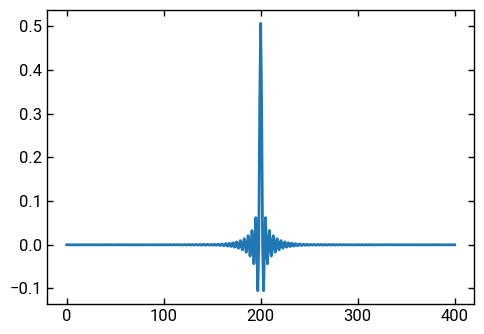

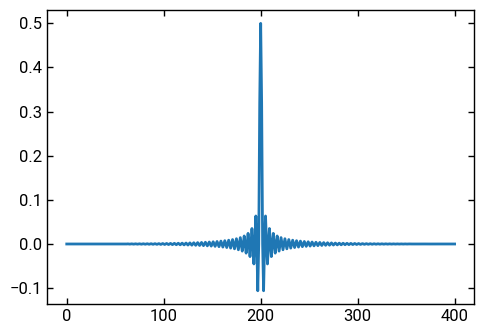

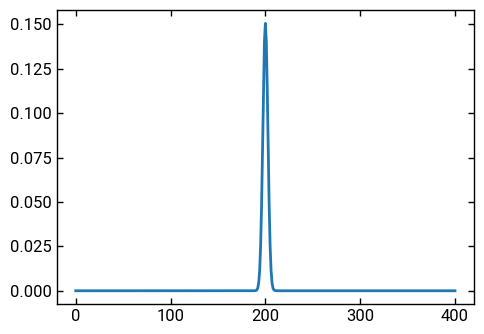

In [5]:
import commstools.dsp.filters as filters
import matplotlib.pyplot as plt

sps = 2
span = 100
fs = sps

rrc = filters.rrc_taps(sps, 0.05, span=span)

plt.figure()
plt.plot(rrc)

sinc = filters.sinc_taps(sps, span=span)

plt.figure()
plt.plot(sinc)

gauss = filters.gaussian_taps(sps, bt=0.1, span=span)

plt.figure()
plt.plot(gauss)


In [10]:
rrc_ = np.conj(rrc[::-1])


In [2]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt


def analyze_filter_spectrum(taps: np.ndarray, fs: float = 1.0):
    """
    Plots magnitude/phase response and calculates -3dB bandwidth.

    Args:
        taps: Array of FIR filter coefficients.
        fs: Sampling frequency (default 1.0 for normalized analysis).
    """
    # Compute frequency response
    # w is in radians/sample (0 to pi)
    w, h = signal.freqz(taps, a=1, whole=False, plot=None)

    # Normalize frequency: 1.0 = Nyquist (fs/2)
    nyquist = fs / 2.0
    norm_freq = (w / np.pi) * nyquist

    # Calculate Magnitude in dB
    mag_db = 20 * np.log10(np.abs(h) + 1e-12)  # epsilon to avoid log(0)

    # Calculate Phase in degrees
    phase_deg = np.rad2deg(np.unwrap(np.angle(h)))

    # --- Plotting ---
    fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(8, 6))

    # Magnitude Plot
    ax1.plot(norm_freq, mag_db, linewidth=1.5)
    ax1.set_ylabel("Magnitude (dB)")
    ax1.set_title("Filter Frequency Response")
    ax1.grid(True, which="both", linestyle="--", alpha=0.7)

    # # -3dB Line
    # peak_gain = np.max(mag_db)
    # ax1.axhline(peak_gain - 3, color="r", linestyle=":", label="-3 dB")
    # ax1.legend()

    # Phase Plot
    ax2.plot(norm_freq, phase_deg, color="orange", linewidth=1.5)
    ax2.set_ylabel("Phase (degrees)")
    ax2.set_xlabel(
        "Frequency (Normalized to Nyquist)" if fs == 1.0 else "Frequency (Hz)"
    )
    ax2.grid(True, which="both", linestyle="--", alpha=0.7)

    plt.tight_layout()
    plt.show()

    # return w, h, mag_db


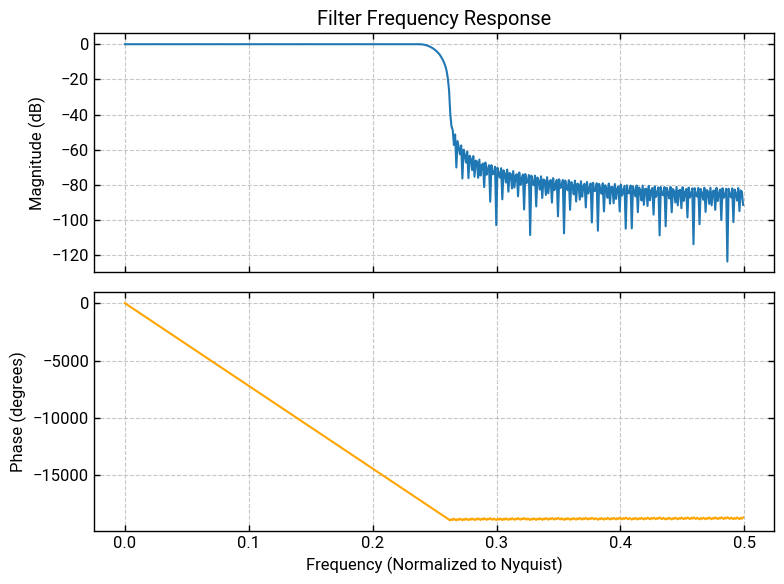

In [7]:
analyze_filter_spectrum(rrc)


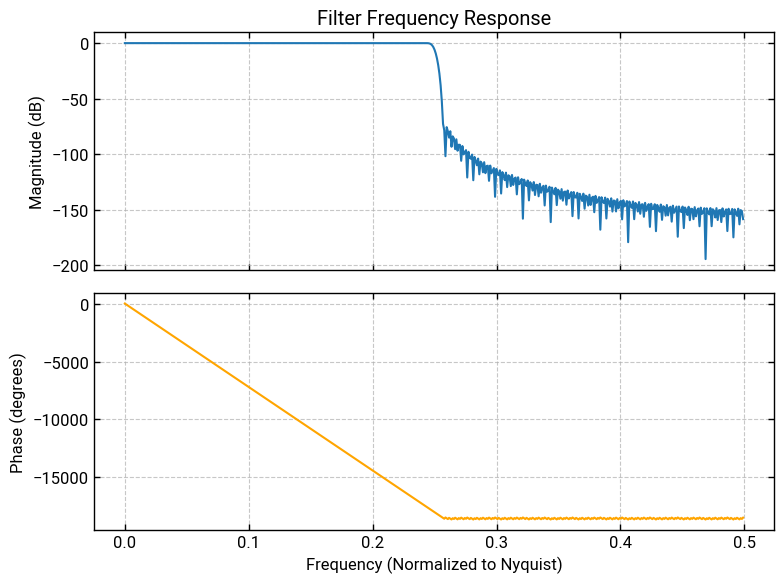

In [6]:
analyze_filter_spectrum(sinc)


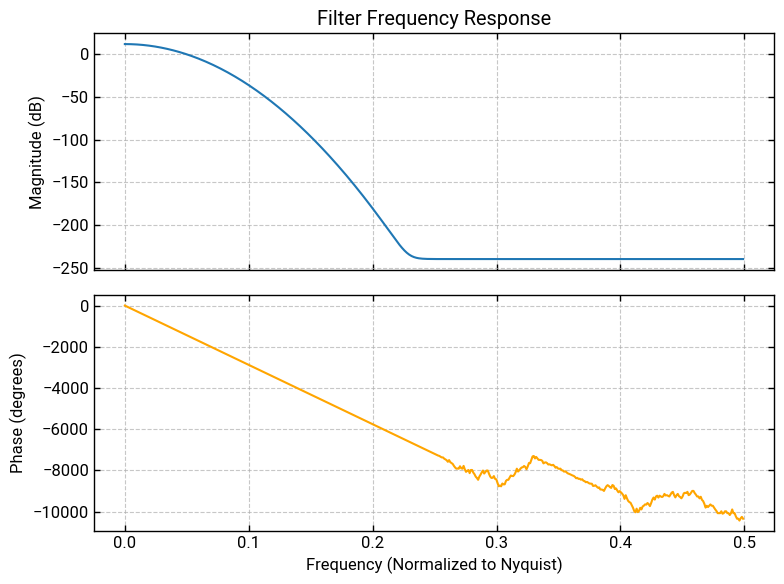

In [9]:
analyze_filter_spectrum(gauss)
